In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
from scipy import interpolate, fftpack, integrate, stats, sparse
from sys import path

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['scatter.marker'] = '.'

In [3]:
path.append('../../')
import prime

In [25]:
def plot_example(diff_method, t, data_f, res_f, sigmas):
    fig, axes = plt.subplots(1, len(sigmas), figsize=[len(sigmas)*4, 3])
    
    res = diff_method.d(np.vstack([data_f(t, s) for s in sigmas]), t)
    for i, s in enumerate(sigmas):
        axes[i].plot(t, res[i])
        axes[i].plot(t, res_f(t))
        axes[i].set_title("Noise: $\sigma$={}".format(s))

## Usage

There are two ways to interact with the code. You can either import a specific Derivative object associated with the desired kind of derivative, or use the functional interface and pass the kind as an argument.

In [22]:
t = np.linspace(0, 2*np.pi, 50)
x = np.sin(t)

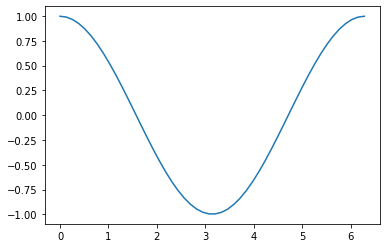

In [20]:
# Import a specific Derivative object associated with the desired kind of derivative
from prime import FiniteDifference

fig,ax = plt.subplots(1)
kind = FiniteDifference(k=1)
ax.plot(t, kind.d(x,t))

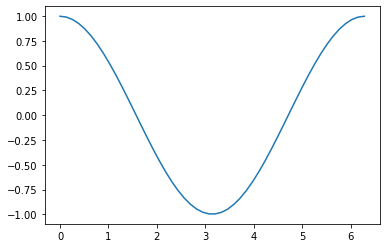

In [21]:
# Use the functional interface and pass the kind as an argument
from prime import dxdt

fig,ax = plt.subplots(1)
ax.plot(t, dxdt(x, t, "finite_difference", k=1))

## Example 1: Smooth derivative

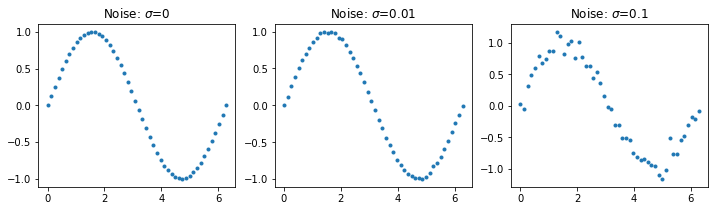

In [26]:
def noisy_sin(t, sigma):
    '''Sine with gaussian noise.'''
    np.random.seed(17)
    return np.sin(t) + np.random.normal(loc=0, scale=sigma, size=t.shape)

sigmas = [0, 0.01, 0.1]
fig, ax = plt.subplots(1, len(sigmas), figsize=[len(sigmas)*4, 3])

t = np.linspace(0, 2*np.pi, 50)
for axs, s in zip(ax, sigmas): 
    axs.scatter(t, noisy_sin(t, s))
    axs.set_title("Noise: $\sigma$={}".format(s))

### Finite differences

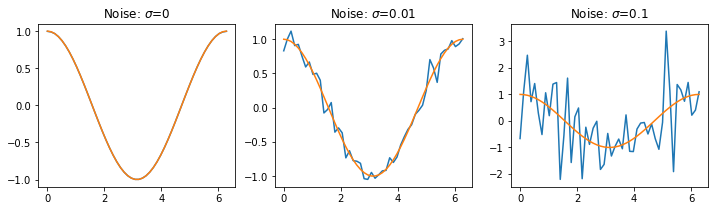

In [28]:
fd = prime.FiniteDifference(3, symmetric=True)
plot_example(fd, t, noisy_sin, np.cos, sigmas)

### Savitzky-Golay filter

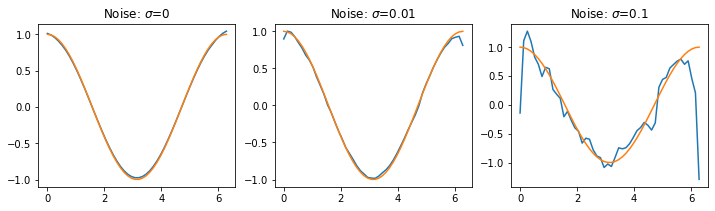

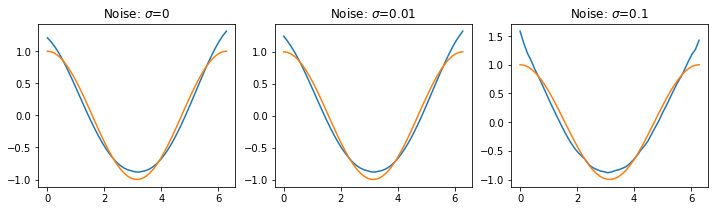

In [29]:
sg = prime.SavitzkyGolay(left=.5, right=.5, order=2)
plot_example(sg, t, noisy_sin, np.cos, sigmas)

sg = prime.SavitzkyGolay(left=3, right=3, order=3)
plot_example(sg, t, noisy_sin, np.cos, sigmas)

### Splines
Smoothing is a hyper-parameter. The Spline functions have re-run functionality built-in so cross-validation should take advantage of this. Also, the data may benefit greatly from binning and re-weighting (weights are an available parameter--they change the definition of the loss function).

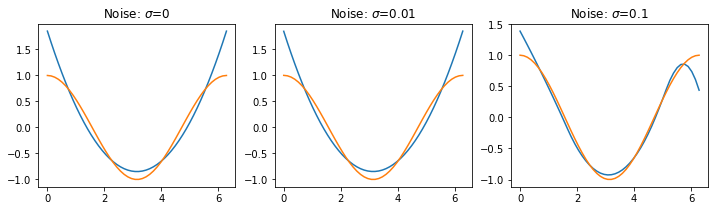

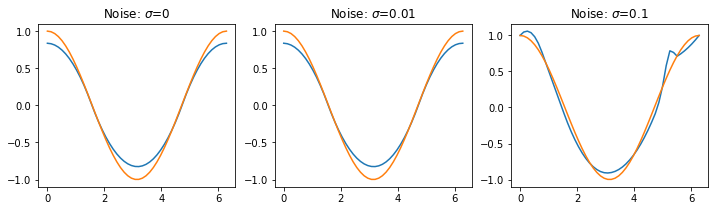

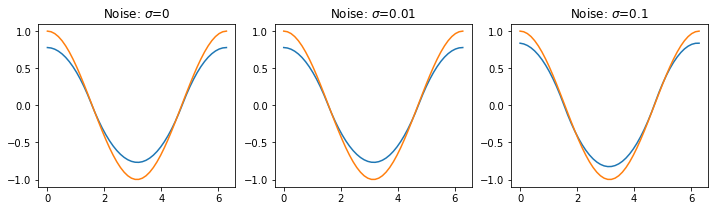

In [31]:
spl = prime.Spline(.5)
plot_example(spl, t, noisy_sin, np.cos, sigmas)
spl = prime.Spline(.5, periodic=True)
plot_example(spl, t, noisy_sin, np.cos, sigmas)
spl = prime.Spline(1, periodic=True)
plot_example(spl, t, noisy_sin, np.cos, sigmas)

### Spectral method
Add your own filter!

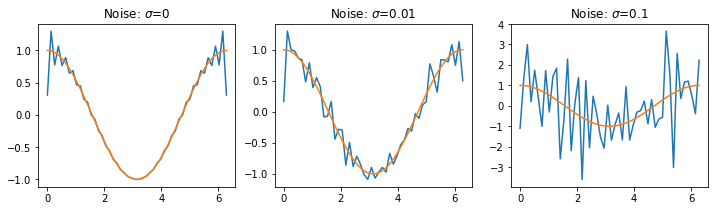

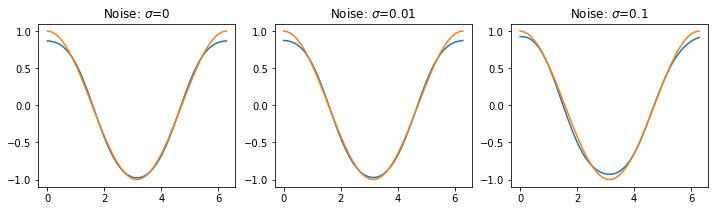

In [33]:
no_filter =  prime.Spectral()
yes_filter = prime.Spectral(filter=np.vectorize(lambda f: 1 if abs(f) < 0.5 else 0))

plot_example(no_filter, t, noisy_sin, np.cos, sigmas)
plot_example(yes_filter, t, noisy_sin, np.cos, sigmas)

### Trend-filtered

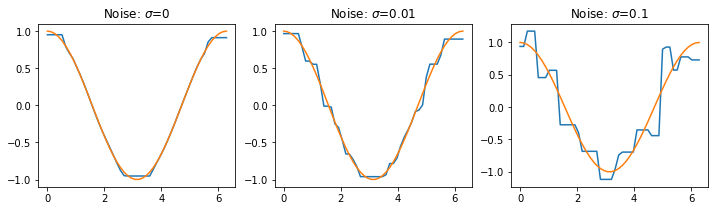

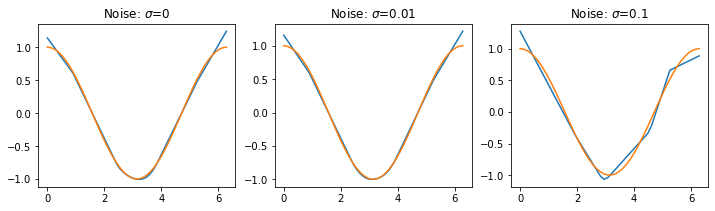

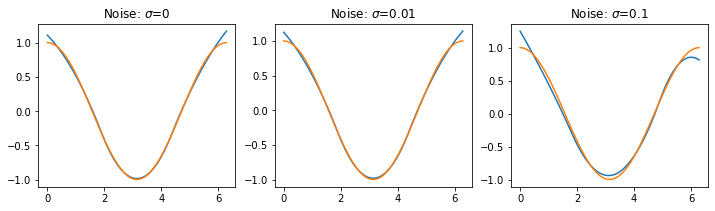

In [34]:
tvd =  prime.TrendFiltered(alpha=1e-3, order=0, max_iter=1e6)
plot_example(tvd, t, noisy_sin, np.cos, sigmas)

tvd =  prime.TrendFiltered(alpha=1e-3, order=1, max_iter=1e6)
plot_example(tvd, t, noisy_sin, np.cos, sigmas)

tvd =  prime.TrendFiltered(alpha=1e-3, order=2, max_iter=1e6)
plot_example(tvd, t, noisy_sin, np.cos, sigmas)

## Example 2: Derivative with jump

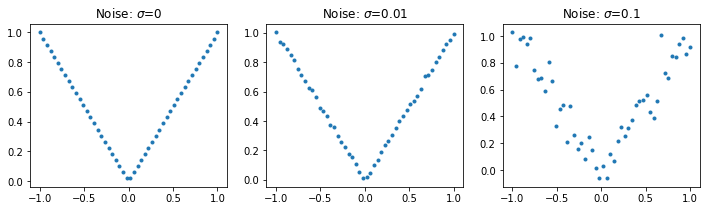

In [35]:
def noisy_abs(t, sigma):
    '''Sine with gaussian noise.'''
    np.random.seed(17)
    return np.abs(t) + np.random.normal(loc=0, scale=sigma, size=x.shape)

d_abs = lambda t: t/abs(t)

sigmas = [0, 0.01, 0.1]
fig, ax = plt.subplots(1, len(sigmas), figsize=[len(sigmas)*4, 3])

t = np.linspace(-1, 1, 50)
for axs, s in zip(ax, sigmas): 
    axs.scatter(t, noisy_abs(t, s))
    axs.set_title("Noise: $\sigma$={}".format(s))

### Finite differences

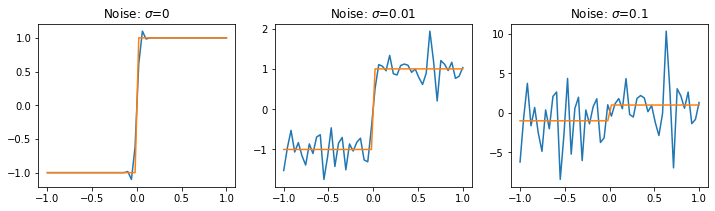

In [36]:
fd = prime.FiniteDifference(k=3)
plot_example(fd, t, noisy_abs, d_abs, sigmas)

### Savitzky-Galoy filter

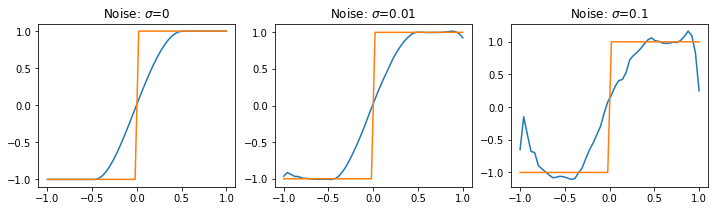

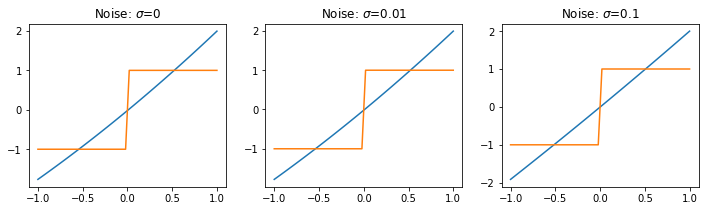

In [37]:
sg = prime.SavitzkyGolay(left=.5, right=.5, order=2)
plot_example(sg, t, noisy_abs, d_abs, sigmas)

sg = prime.SavitzkyGolay(left=3, right=3, order=3)
plot_example(sg, t, noisy_abs, d_abs, sigmas)

### Splines

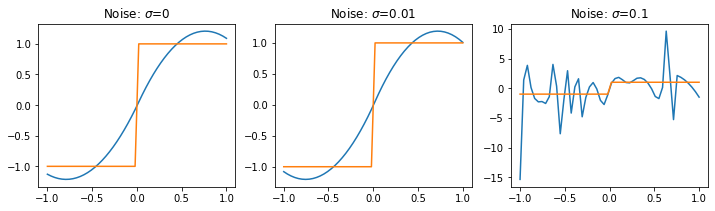

In [38]:
spl = prime.Spline(.1)
plot_example(spl, t, noisy_abs, d_abs, sigmas)

### Spectral Method

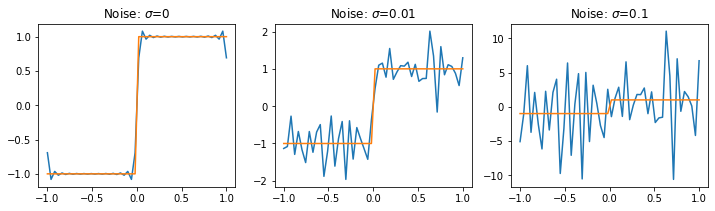

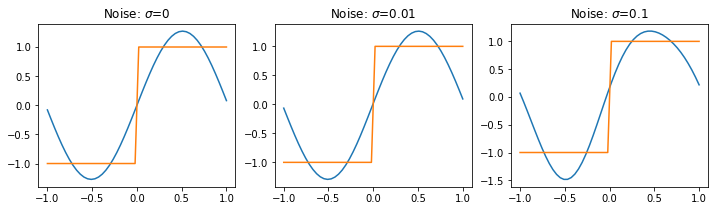

In [39]:
no_filter =  prime.Spectral()
yes_filter = prime.Spectral(filter=np.vectorize(lambda f: 1 if abs(f) < 1 else 0))

plot_example(no_filter, t, noisy_abs, d_abs, sigmas)
plot_example(yes_filter, t, noisy_abs, d_abs, sigmas)

### Trend-filtered

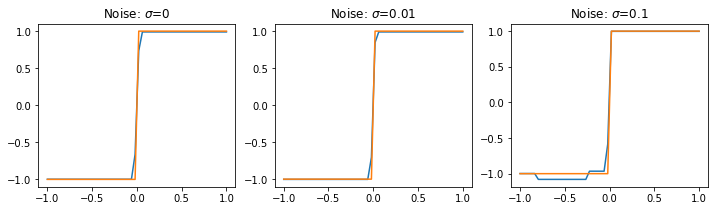

In [40]:
tvd =  prime.TrendFiltered(alpha=1e-3, order=0, max_iter=1e5)
plot_example(tvd, t, noisy_abs, d_abs, sigmas)